In [2]:
using CairoMakie, LinearAlgebra

In [3]:
function morse_potential(r::Float64, De::Float64, α::Float64, r_e::Float64)
    return De * (1 - exp(-α*(r - r_e)))^2
end

function harmonic_potential(r::Float64, k::Float64, r_e::Float64)
    return 0.5 * k * (r - r_e)^2
end

function harmonic_param_map_1(r::Float64, De::Float64, α::Float64, r_e::Float64)
    r_e_pd = r + (1 - exp(-α * (r - r_e)))
    k_pd = 2 * De
    return (k_pd, r_e_pd)
end

function harmonic_param_map_2(r::Float64, De::Float64, α::Float64, r_e::Float64)
    r_e_pd = r * (exp(-α * (r - r_e)))
    k_pd = 2 * De / r^2
    return (k_pd, r_e_pd)
end

function harmonic_to_morse_1(r::Float64, De::Float64, α::Float64, r_e::Float64)
    k_pd, r_e_pd = harmonic_param_map_1(r, De, α, r_e)
    return harmonic_potential(r, k_pd, r_e_pd)
end

function harmonic_to_morse_2(r::Float64, De::Float64, α::Float64, r_e::Float64)
    k_pd, r_e_pd = harmonic_param_map_2(r, De, α, r_e)
    return harmonic_potential(r, k_pd, r_e_pd)
end

harmonic_to_morse_2 (generic function with 1 method)

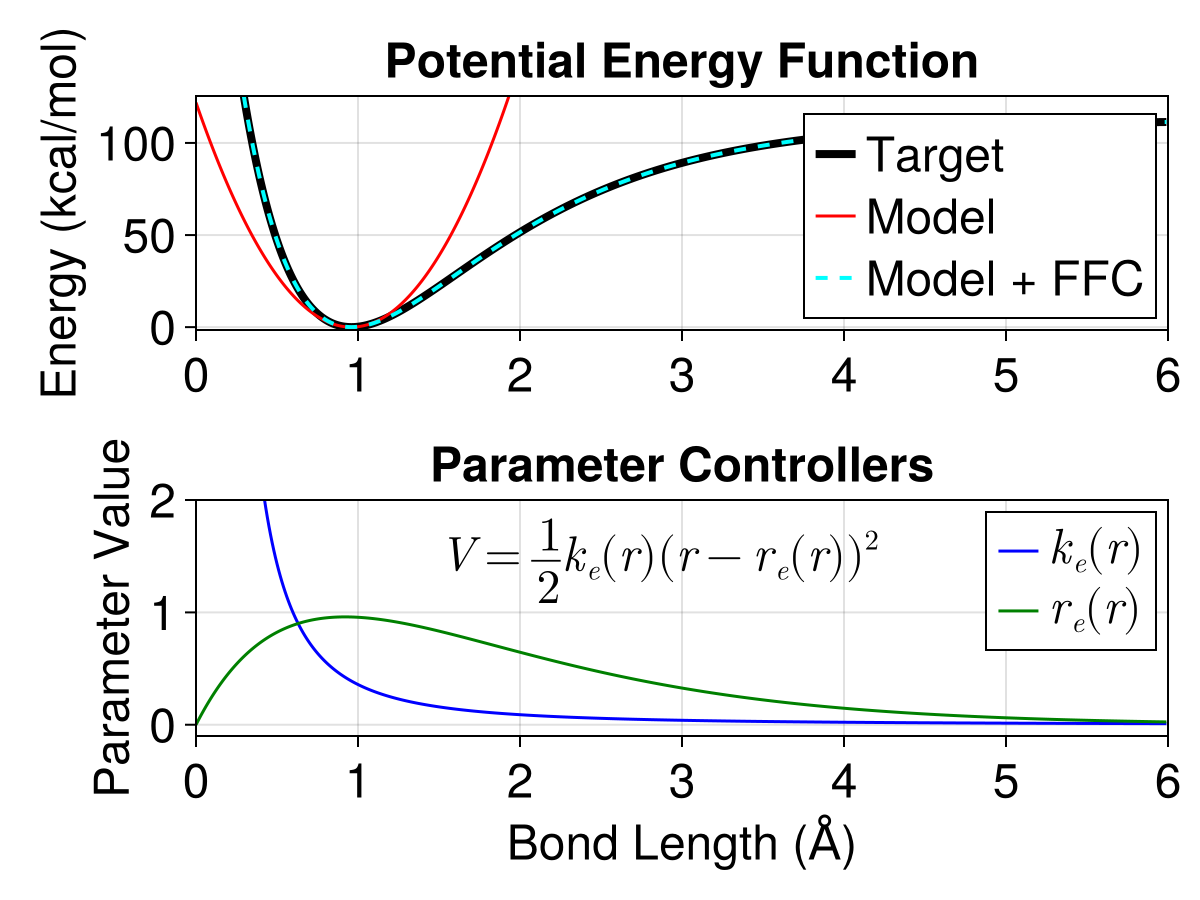

In [78]:
function plot_harmonic_and_morse()
    fig = Figure(fontsize=24)
    ax1 = Axis(fig[1, 1])
    ax2 = Axis(fig[2, 1], yticks=0.0:1.0:10.0)

    x = -1.0:0.01:8.0

    De = 0.179
    α = 1.08645
    r_e = 0.959
    
    k = 2 * α^2 * De

    lines!(ax1, x, morse_potential.(x, (De,), (α,), (r_e,)) * 627.51, color=:black, linewidth=4, label="Target")
    lines!(ax1, x, harmonic_potential.(x, (k,), (r_e,)) * 627.51, color=:red, label="Model")
    lines!(ax1, x, harmonic_to_morse_2.(x, (De,), (α,), (r_e,)) * 627.51, color=:cyan, linestyle=:dash, linewidth=2, label="Model + FFC")
    
    axislegend(ax1, position=:rb)

    xlims!(ax1, 0.0, 6.0)
    ylims!(ax1, -0.0025 * 627.51, 0.2 * 627.51)

    k_map_2 = [harmonic_param_map_2(x[i], De, α, r_e)[1] for i in eachindex(x)]
    r_e_map_2 = [harmonic_param_map_2(x[i], De, α, r_e)[2] for i in eachindex(x)]

    lines!(ax2, x, k_map_2, color=:blue, label=L"k_e(r)")
    lines!(ax2, x, r_e_map_2, color=:green, label=L"r_e(r)")

    axislegend(ax2, position=:rt)

    xlims!(ax2, 0.0, 6.0)
    ylims!(ax2, -0.1, 2.0)

    text!(ax2, (1.5, 1.0), text=L"V=\frac12 k_e(r) (r-r_e(r))^2")

    ax1.title = "Potential Energy Function"
    ax2.title = "Parameter Controllers"

    ax2.xlabel = "Bond Length (Å)"
    ax1.ylabel = "Energy (kcal/mol)"
    ax2.ylabel = "Parameter Value"

    save("harmonic_ffc_example.svg", fig)

    fig
end
plot_harmonic_and_morse()

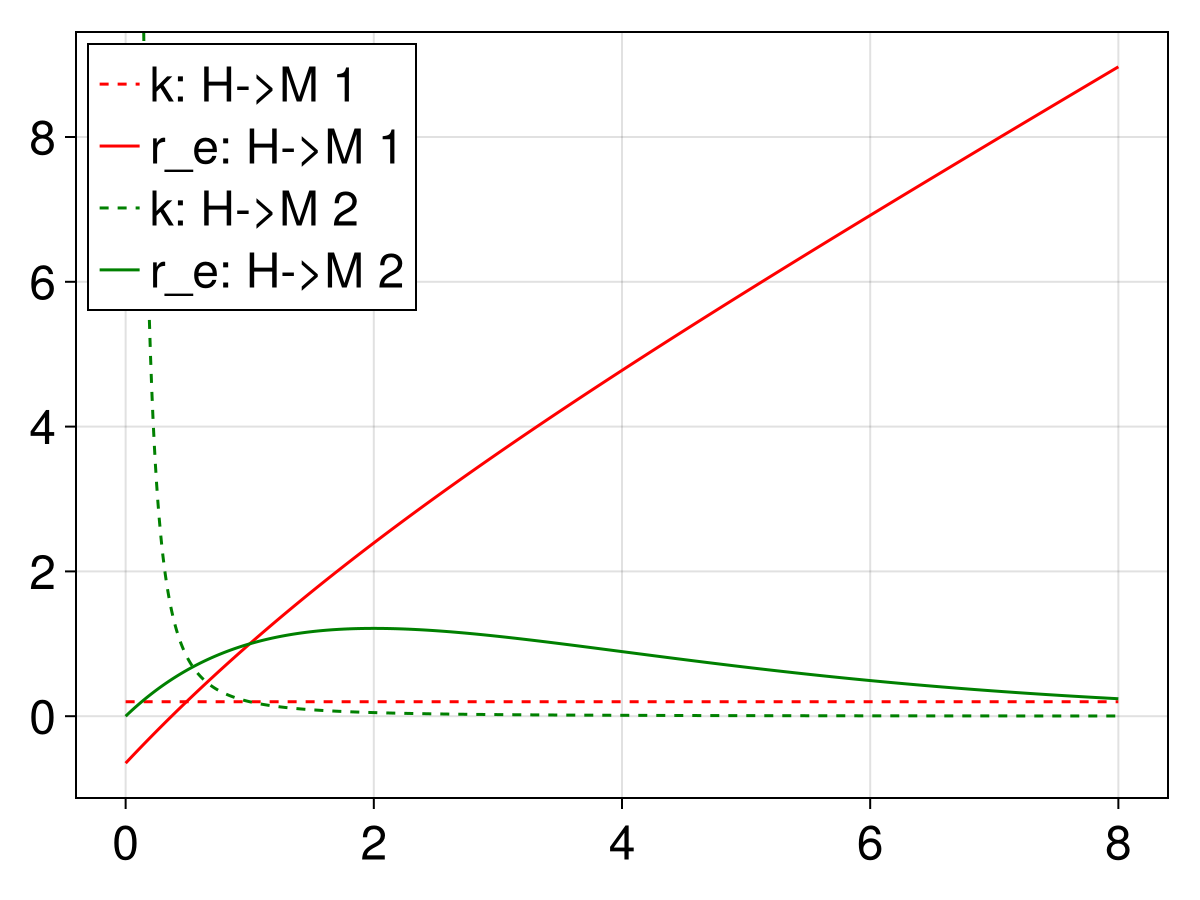

In [5]:
function plot_harmonic_to_morse_maps()
    fig = Figure(fontsize=24)
    ax1 = Axis(fig[1,1])

    x = 0.0:0.01:8.0

    De = 0.1
    α = 0.5
    r_e = 1.0
    
    k = 2 * α^2 * De

    k_map_1 = [harmonic_param_map_1(x[i], De, α, r_e)[1] for i in eachindex(x)]
    r_e_map_1 = [harmonic_param_map_1(x[i], De, α, r_e)[2] for i in eachindex(x)]
    k_map_2 = [harmonic_param_map_2(x[i], De, α, r_e)[1] for i in eachindex(x)]
    r_e_map_2 = [harmonic_param_map_2(x[i], De, α, r_e)[2] for i in eachindex(x)]

    lines!(ax1, x, k_map_1, color=:red, linestyle=:dash, label="k: H->M 1")
    lines!(ax1, x, r_e_map_1, color=:red, label="r_e: H->M 1")
    lines!(ax1, x, k_map_2, color=:green, linestyle=:dash, label="k: H->M 2")
    lines!(ax1, x, r_e_map_2, color=:green, label="r_e: H->M 2")
    
    axislegend(position=:lt)
    fig
end
plot_harmonic_to_morse_maps()